In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
# import matplotlib_hangul
# %matplotlib inline

import tensorflow as tf
import os
import PIL
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 기본 경로
base_dir = '/content/drive/MyDrive/BME AI/CNN classification/data2/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


In [4]:
# 훈련용 이미지 경로
train_normal_dir = os.path.join(train_dir, 'normal')
train_mbd_body_dir = os.path.join(train_dir, 'MBD_body')
train_mbd_tail_dir = os.path.join(train_dir, 'MBD_tail')
train_mbd_etc_dir = os.path.join(train_dir, 'MBD_etc')
print(train_mbd_body_dir, train_mbd_tail_dir, train_mbd_etc_dir, train_normal_dir)

/content/drive/MyDrive/BME AI/CNN classification/data2/train/MBD_body /content/drive/MyDrive/BME AI/CNN classification/data2/train/MBD_tail /content/drive/MyDrive/BME AI/CNN classification/data2/train/MBD_etc /content/drive/MyDrive/BME AI/CNN classification/data2/train/normal


In [5]:
# 검증용 이미지 경로
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_mbd_body_dir = os.path.join(validation_dir, 'MBD_body')
validation_mbd_tail_dir = os.path.join(validation_dir, 'MBD_tail')
validation_mbd_etc_dir = os.path.join(validation_dir, 'MBD_etc')
print(validation_mbd_body_dir, validation_mbd_tail_dir, validation_mbd_etc_dir, validation_normal_dir)

/content/drive/MyDrive/BME AI/CNN classification/data2/validation/MBD_body /content/drive/MyDrive/BME AI/CNN classification/data2/validation/MBD_tail /content/drive/MyDrive/BME AI/CNN classification/data2/validation/MBD_etc /content/drive/MyDrive/BME AI/CNN classification/data2/validation/normal


In [6]:
# 테스트용 이미지 경로
test_normal_dir = os.path.join(test_dir, 'normal')
test_mbd_body_dir = os.path.join(test_dir, 'MBD_body')
test_mbd_tail_dir = os.path.join(test_dir, 'MBD_tail')
test_mbd_etc_dir = os.path.join(test_dir, 'MBD_etc')
print(test_mbd_body_dir, test_mbd_tail_dir, test_mbd_etc_dir, test_normal_dir)

/content/drive/MyDrive/BME AI/CNN classification/data2/test/MBD_body /content/drive/MyDrive/BME AI/CNN classification/data2/test/MBD_tail /content/drive/MyDrive/BME AI/CNN classification/data2/test/MBD_etc /content/drive/MyDrive/BME AI/CNN classification/data2/test/normal


In [7]:
# 훈련용 이미지 파일 이름 조회
train_mbd_body_fnames = os.listdir(train_mbd_body_dir)
train_mbd_tail_fnames = os.listdir(train_mbd_tail_dir)
train_mbd_etc_fnames = os.listdir(train_mbd_etc_dir)
train_normal_fnames = os.listdir(train_normal_dir)
print(train_mbd_body_fnames)
print(train_mbd_tail_fnames)
print(train_mbd_etc_fnames)
print(train_normal_fnames)

['augmented_zoom_image24.jpg', 'augmented_zoom_image29.jpg', 'KakaoTalk_20230519_193249110_07_inverted.jpg', 'KakaoTalk_20230519_193229833_09_rotated.jpg', 'augmented_zoom_image9.jpg', 'KakaoTalk_20230519_193229833_22_inverted.jpg', 'augmented_zoom_image10.jpg', 'KakaoTalk_20230519_193229833_04_inverted.jpg', 'KakaoTalk_20230519_193229833_29_inverted.jpg', 'KakaoTalk_20230519_193229833_20_inverted.jpg', 'augmented_zoom_image7.jpg', 'augmented_zoom_image2.jpg', 'augmented_zoom_image4.jpg', 'augmented_zoom_image20.jpg', 'augmented_zoom_image5.jpg', 'KakaoTalk_20230519_193229833_12_inverted.jpg', 'augmented_zoom_image22.jpg', 'augmented_zoom_image25.jpg', 'KakaoTalk_20230519_193229833_rotated.jpg', 'augmented_zoom_image27.jpg', 'KakaoTalk_20230519_193229833_25.jpg', 'KakaoTalk_20230519_193249110_05_rotated.jpg', 'KakaoTalk_20230519_193229833_25_inverted.jpg', 'KakaoTalk_20230519_193249110_20_inverted.jpg', 'KakaoTalk_20230519_193229833_20_rotated.jpg', 'KakaoTalk_20230519_193249110_15_rot

In [8]:
print('Total training normal images :', len(os.listdir(train_normal_dir)))
print('Total training mbd body images :', len(os.listdir(train_mbd_body_dir)))
print('Total training mbd tail images :', len(os.listdir(train_mbd_tail_dir)))
print('Total training mbd etc images :', len(os.listdir(train_mbd_etc_dir)))


print('Total validation normal images :', len(os.listdir(validation_normal_dir)))
print('Total validation mbd body images :', len(os.listdir(validation_mbd_body_dir)))
print('Total validation mbd tail images :', len(os.listdir(validation_mbd_tail_dir)))
print('Total validation mbd etc images :', len(os.listdir(validation_mbd_etc_dir)))


print('Total test normal images :', len(os.listdir(test_normal_dir)))
print('Total test mbd body images :', len(os.listdir(test_mbd_body_dir)))
print('Total test mbd tail images :', len(os.listdir(test_mbd_tail_dir)))
print('Total test mbd etc images :', len(os.listdir(test_mbd_etc_dir)))

Total training normal images : 269
Total training mbd body images : 149
Total training mbd tail images : 109
Total training mbd etc images : 23
Total validation normal images : 37
Total validation mbd body images : 20
Total validation mbd tail images : 7
Total validation mbd etc images : 2
Total test normal images : 39
Total test mbd body images : 40
Total test mbd tail images : 10
Total test mbd etc images : 5


In [9]:
# 이미지 확인
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 10, 10
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 10

next_mbd_body_pix = [os.path.join(train_mbd_body_dir, fname) for fname in train_mbd_body_fnames[pic_index-8:pic_index]]
next_mbd_tail_pix = [os.path.join(train_mbd_tail_dir, fname) for fname in train_mbd_tail_fnames[pic_index-8:pic_index]]
next_mbd_etc_pix = [os.path.join(train_mbd_etc_dir, fname) for fname in train_mbd_etc_fnames[pic_index-8:pic_index]]
next_normal_pix = [os.path.join(train_normal_dir, fname) for fname in train_normal_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_mbd_body_pix + next_mbd_tail_pix + next_mbd_etc_pix + next_normal_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [10]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=25,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

# validation 및 test 이미지는 augmentation을 적용하지 않음
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)



In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # 훈련 데이터셋 디렉토리
    target_size=(150, 150),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical')  # 클래스 모드를 categorical로 설정하여 레이블 형식을 지정

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,  # 검증 데이터셋 디렉토리
    target_size=(150, 150),
    batch_size=4,
    color_mode='grayscale',
    class_mode='categorical')  # 클래스 모드를 categorical로 설정하여 레이블 형식을 지정

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='grayscale',
                                                  class_mode='categorical',
                                                  target_size=(150,150))

Found 550 images belonging to 4 classes.
Found 66 images belonging to 4 classes.
Found 94 images belonging to 4 classes.


In [12]:
# class 확인
train_generator.class_indices

{'MBD_body': 0, 'MBD_etc': 1, 'MBD_tail': 2, 'normal': 3}

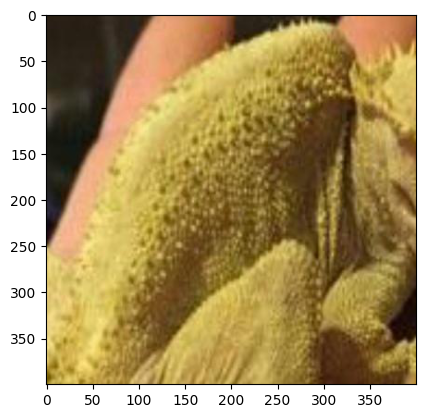

In [13]:
# 이미지 하나 불러오기
sample_img = mpimg.imread(next_mbd_body_pix[0])
plt.imshow(sample_img)
plt.show()

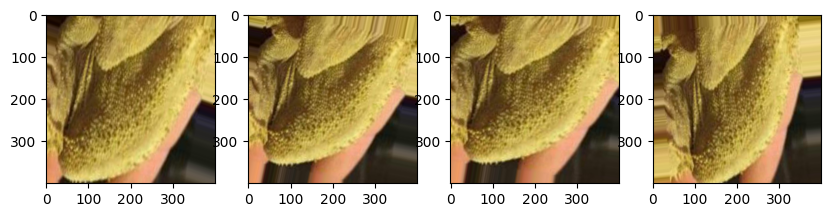

In [14]:
max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]
# 축을 하나 추가했는데, 하나의 이미지만 바꿔주는게 아니라 동시에 여러개의 이미지를 바꿔줄 수 있기에,
# 그림 개수/장수 까지 받아서 4차원으로 (개수/장수, h, w, channel) 이렇게 받는다
# 쉽게 말해, 받는 형식이 4차원이라서 4차원 형태로 만들어 준것

plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt == max_iter:
        break
    cnt += 1

In [15]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # 클래스 수가 4이고 softmax 활성화 함수를 사용합니다.
])
model.summary()  # 신경망의 구조 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [16]:
from tensorflow.keras.optimizers import RMSprop


model.compile(optimizer=RMSprop(learning_rate=0.001), # 옵티마이저로는 RMSprop 사용
              loss='binary_crossentropy', # 손실 함수로 ‘binary_crossentropy’ 사용
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다.

In [18]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=4,
                    epochs=100,
                    validation_steps=4,
                    verbose=2,
                    class_weight={0: 1, 1: 1, 2: 1, 3: 1})


Epoch 1/100
4/4 - 19s - loss: 0.6414 - accuracy: 0.3828 - val_loss: 0.5004 - val_accuracy: 0.5625 - 19s/epoch - 5s/step
Epoch 2/100
4/4 - 6s - loss: 0.5006 - accuracy: 0.5234 - val_loss: 0.5269 - val_accuracy: 0.4375 - 6s/epoch - 1s/step
Epoch 3/100
4/4 - 6s - loss: 0.5266 - accuracy: 0.4766 - val_loss: 0.5076 - val_accuracy: 0.4375 - 6s/epoch - 1s/step
Epoch 4/100
4/4 - 3s - loss: 0.4718 - accuracy: 0.5312 - val_loss: 0.4735 - val_accuracy: 0.5000 - 3s/epoch - 691ms/step
Epoch 5/100
4/4 - 3s - loss: 0.5104 - accuracy: 0.4844 - val_loss: 0.4346 - val_accuracy: 0.5625 - 3s/epoch - 729ms/step
Epoch 6/100
4/4 - 2s - loss: 0.4811 - accuracy: 0.5294 - val_loss: 0.4732 - val_accuracy: 0.5625 - 2s/epoch - 606ms/step
Epoch 7/100
4/4 - 2s - loss: 0.4707 - accuracy: 0.5312 - val_loss: 0.4506 - val_accuracy: 0.5000 - 2s/epoch - 420ms/step
Epoch 8/100
4/4 - 1s - loss: 0.5117 - accuracy: 0.4141 - val_loss: 0.4652 - val_accuracy: 0.4375 - 1s/epoch - 283ms/step
Epoch 9/100
4/4 - 1s - loss: 0.4662 - a

In [19]:
# 모델 성능 평가
model.evaluate(train_generator)


18/18 [==============================] - 4s 199ms/step - loss: 0.3019 - accuracy: 0.7436


[0.3018903136253357, 0.7436363697052002]

In [20]:
model.evaluate(validation_generator)

17/17 [==============================] - 1s 29ms/step - loss: 0.1839 - accuracy: 0.8788


[0.18388307094573975, 0.8787878751754761]

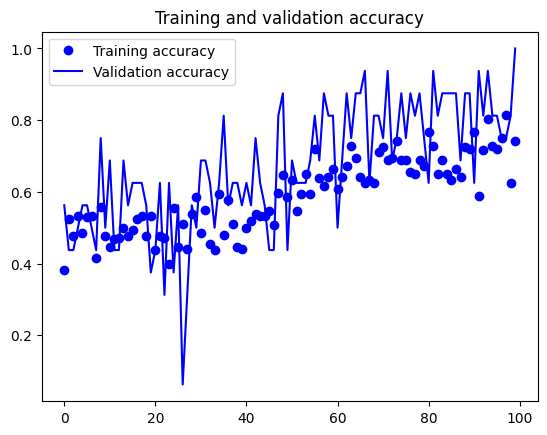

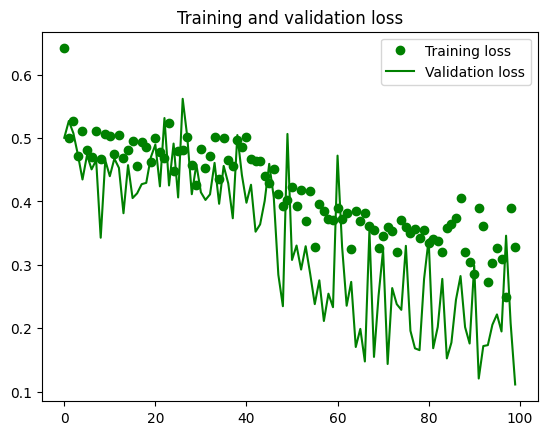

In [21]:
# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
# 이제 테스트 이미지 분류
import numpy as np
from tensorflow.keras.utils import load_img

# 테스트용 mbd body 이미지 경로 설정
test_dir = '/content/drive/MyDrive/BME AI/CNN classification/data2/test/'
test_mbd_body_dir = os.path.join(test_dir, 'MBD_body/')
test_mbd_body_filenames = os.listdir(test_mbd_body_dir)
test_mbd_body_filenames

# 테스트용 mbd tail 이미지 경로 설정
test_mbd_tail_dir = os.path.join(test_dir, 'MBD_tail/')
test_mbd_tail_filenames = os.listdir(test_mbd_tail_dir)
test_mbd_tail_filenames

# 테스트용 mbd etc 이미지 경로 설정
test_mbd_etc_dir = os.path.join(test_dir, 'MBD_etc/')
test_mbd_etc_filenames = os.listdir(test_mbd_etc_dir)
test_mbd_etc_filenames

# 테스트용 normal 이미지 경로 설정
test_dir = '/content/drive/MyDrive/BME AI/CNN classification/data2/test/'
test_normal_dir = os.path.join(test_dir, 'normal/')
test_normal_filenames = os.listdir(test_normal_dir)
test_normal_filenames

# mbd, normal을 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_mn_filenames = {}
dic_mn_filenames['MBD_body'] = test_mbd_body_filenames
dic_mn_filenames['MBD_tail'] = test_mbd_tail_filenames
dic_mn_filenames['MBD_etc'] = test_mbd_etc_filenames
dic_mn_filenames['normal'] = test_normal_filenames


1/1 [==============================] - 0s 21ms/step


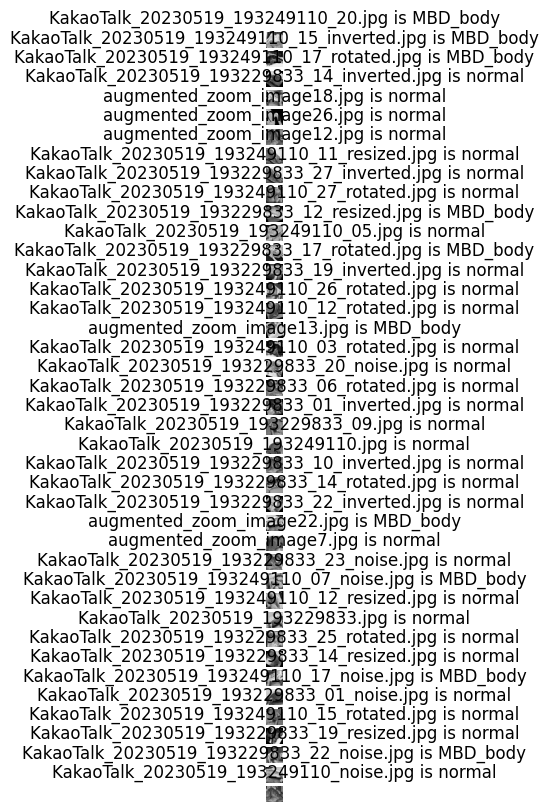

1/1 [==============================] - 0s 19ms/step


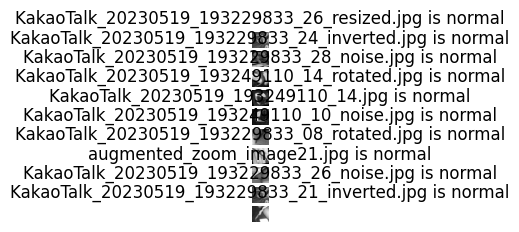

1/1 [==============================] - 0s 29ms/step


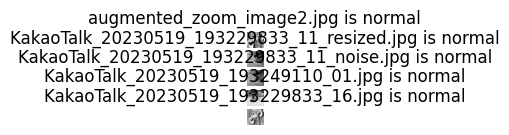

1/1 [==============================] - 0s 21ms/step


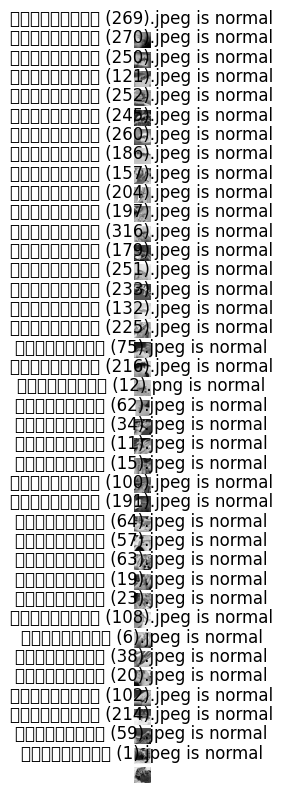

In [27]:
class_names = ['MBD_body', 'MBD_etc', 'MBD_tail', 'normal']
# MBD 분류 테스트
for mn, filenames in dic_mn_filenames.items():
    fig = plt.figure(figsize=(16,10))
    rows, cols = 40, 1
    for i, fn in enumerate(filenames):
        path = test_dir + mn + '/' + fn
        test_img = image.load_img(path, color_mode='grayscale', target_size=(150, 150), interpolation='bilinear')        
        x = image.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)
        predicted_class_index = np.argmax(classes[0])  # 가장 높은 확률을 가진 인덱스 가져오기
        predicted_class = class_names[predicted_class_index]  # class_names 리스트를 사용하여 예측된 클래스 레이블 가져오기

        
        fig.add_subplot(rows, cols, i+1)
        plt.title(fn + " is " + predicted_class)
        plt.axis('off')
        plt.imshow(test_img, cmap='gray')
    plt.show();


In [28]:
# 모델 성능 평가
model.evaluate(test_generator)

24/24 [==============================] - 0s 19ms/step - loss: 0.2961 - accuracy: 0.7660


[0.2961382269859314, 0.7659574747085571]